**Business Objective:** The goal would be to identify which customers are most likely to leave the service and udnerstnadn key factors driving the their decision to leave. Churn reduction through preictive anlysis.

**Business Value:** Customer retnetion is critical for bank's profitability. Predicting which customers are likley to churn can help the bank take proactivce steps like offering personlized services or incentives to retain valuable customers.

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.5)
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


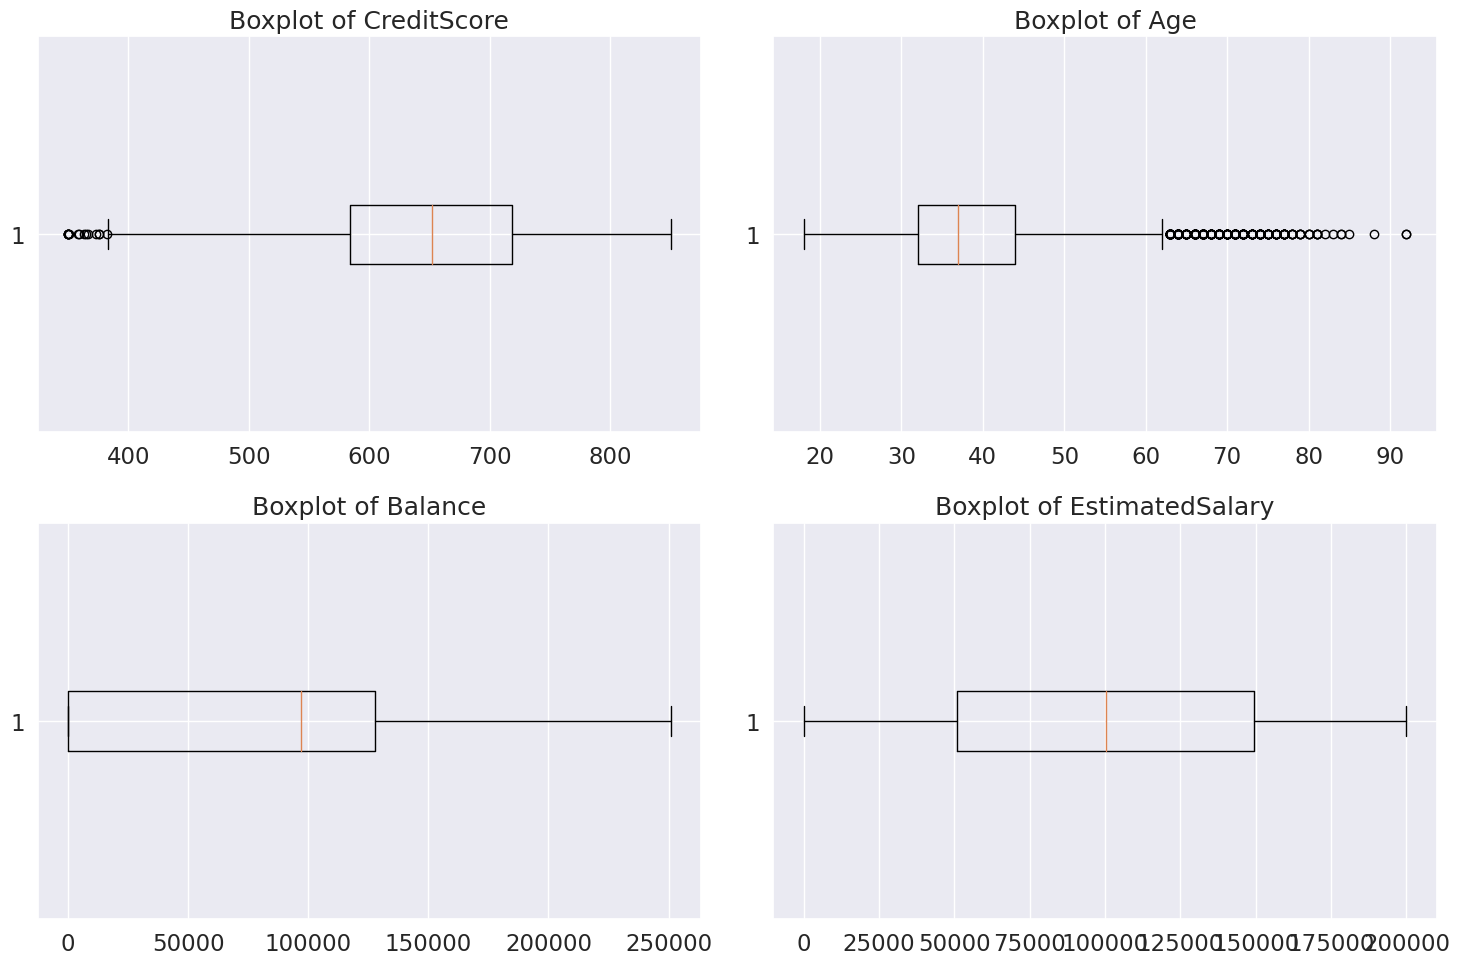

In [ ]:
numerical_features = ['CreditScore', 'Age', 'Balance','EstimatedSalary']

plt.figure(figsize=(15, 10))
for i , feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
df['CreditScore'].describe()

,CreditScore
count,10000.000000
mean,650.528800
std,96.653299
min,350.000000
25%,584.000000
50%,652.000000
75%,718.000000
max,850.000000


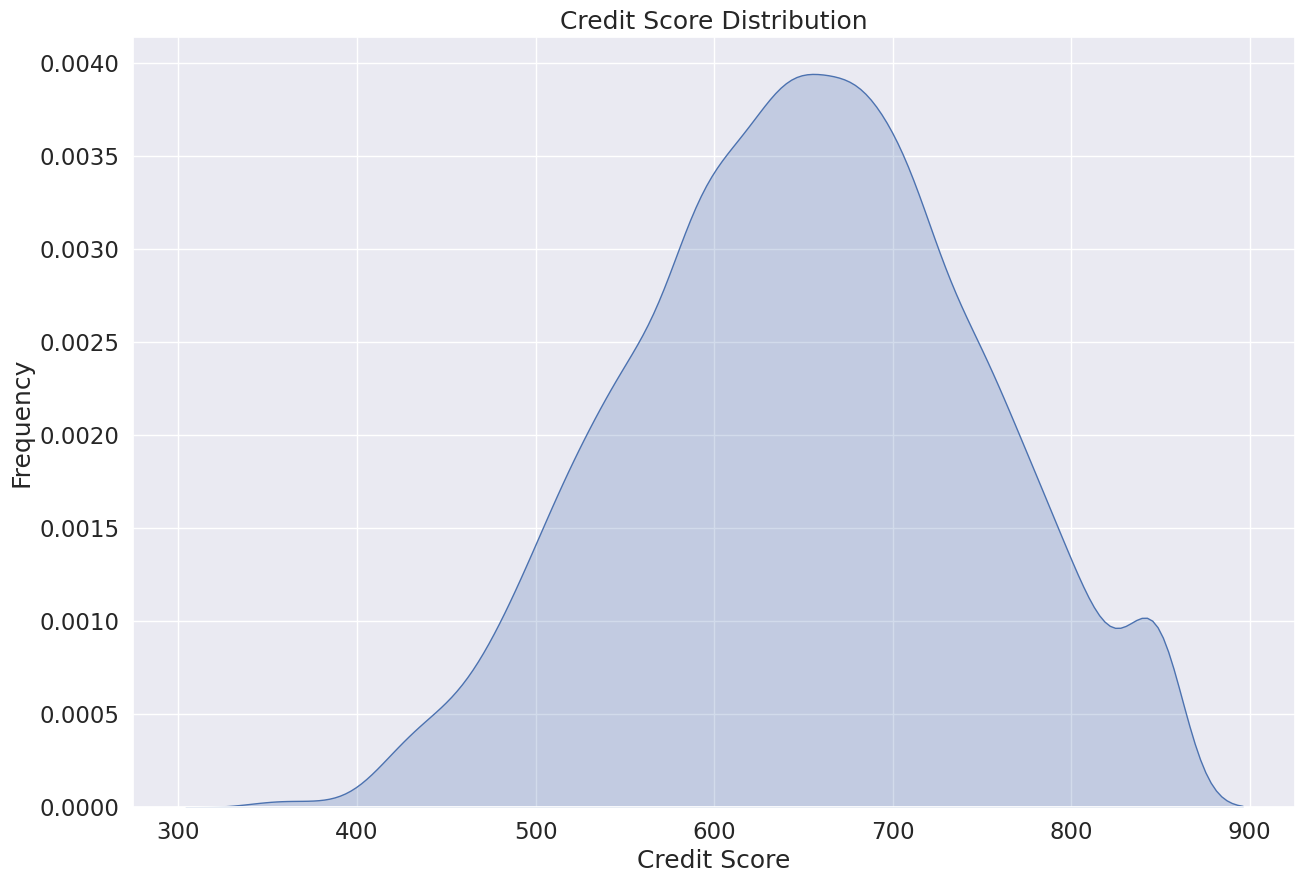

In [ ]:
plt.figure(figsize=(15, 10))

sns.kdeplot(df['CreditScore'], fill=True, palette = "Set2")
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

plt.show()


In [ ]:
df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


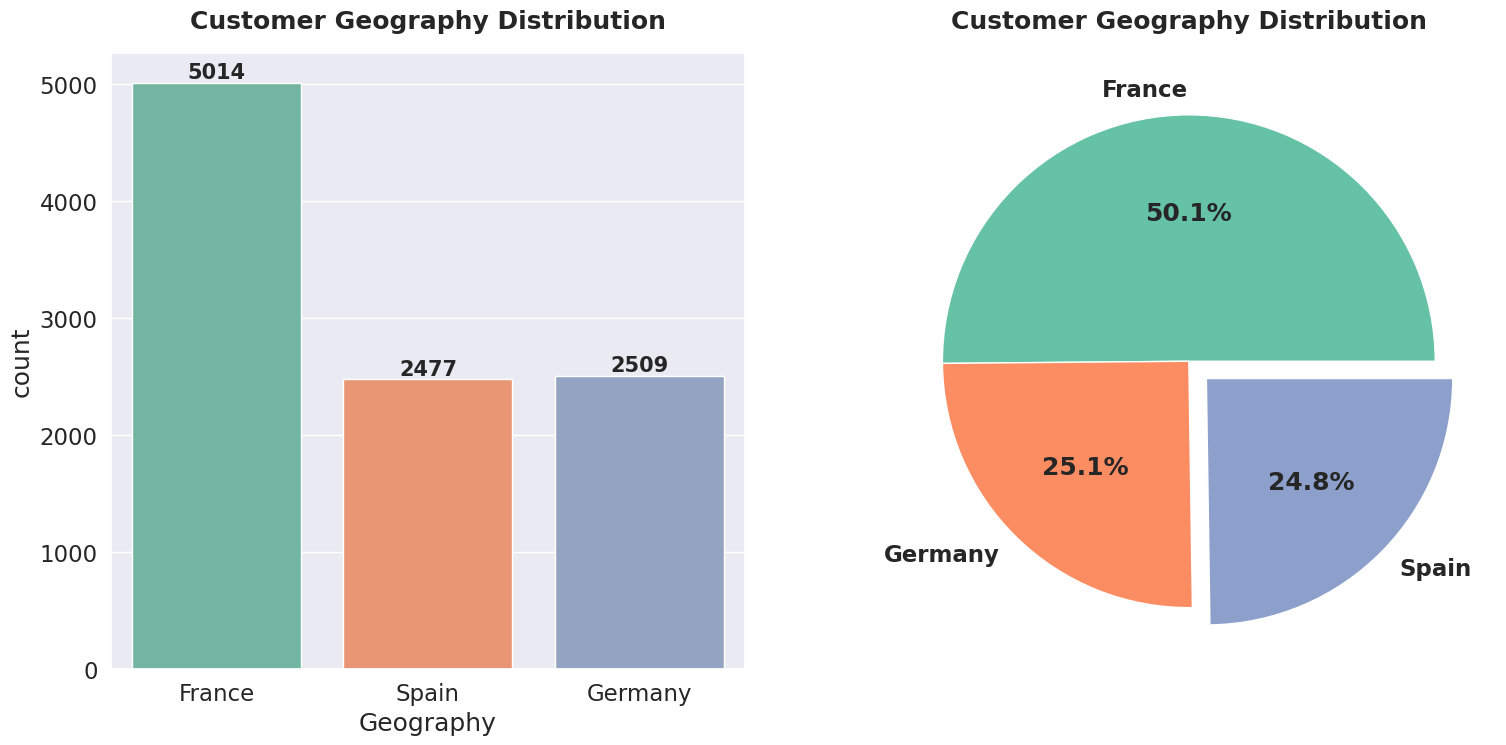

In [ ]:
count = df['Geography'].value_counts()

plt.figure(figsize=(18, 8))
plt.subplot(1,2,1)
ax = sns.countplot(data= df , x= 'Geography', palette = 'Set2')
for container in ax.containers:
  ax.bar_label(container, fontweight = 'black', size=15)
plt.title('Customer Geography Distribution', fontweight = 'black', size= 18, pad = 18)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct='%1.1f%%', colors=sns.set_palette('Set2'),
        textprops={'fontweight':'black'}, explode = [0, 0, 0.1])
plt.title('Customer Geography Distribution', fontweight = 'black', size= 18, pad = 18)

plt.show()

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


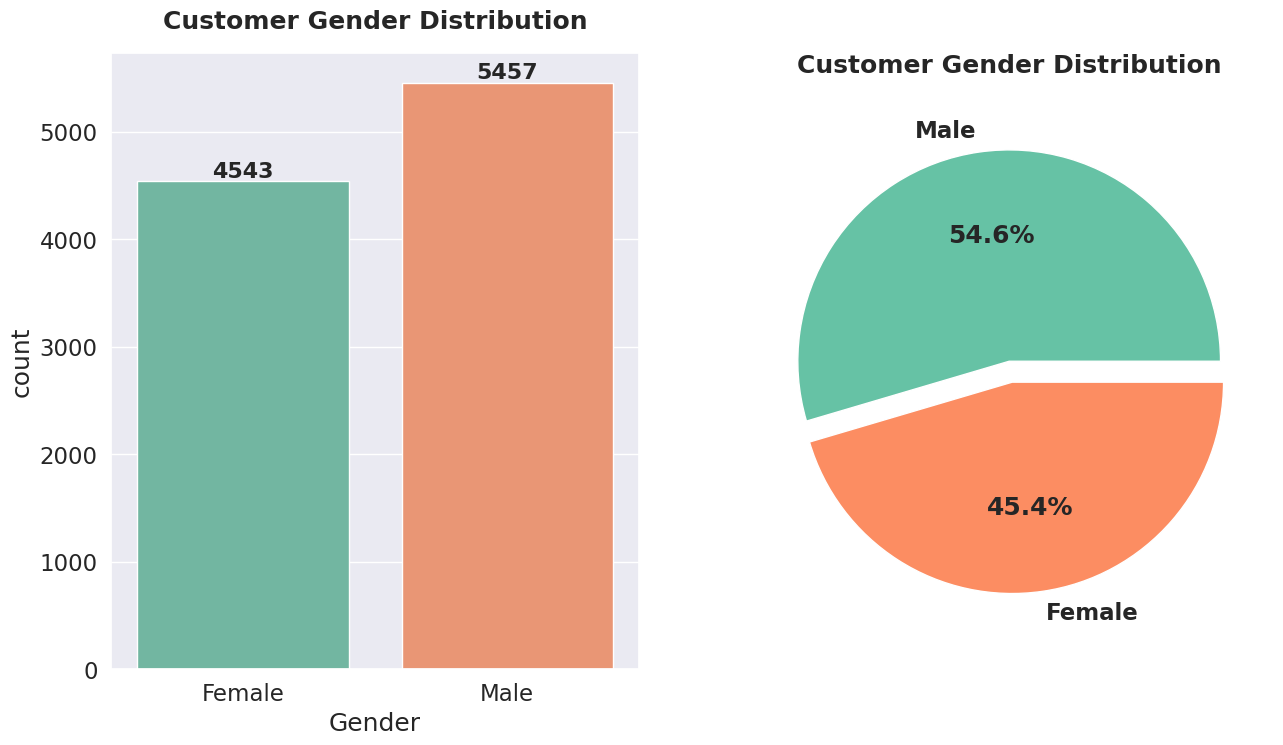

In [ ]:
count = df['Gender'].value_counts()

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)

ax = sns.countplot(data = df, x='Gender', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container, fontweight = 'black' , size = 16, label_type = 'edge')
plt.title('Customer Gender Distribution', fontweight = 'black', size = 18 , pad = 18 )

plt.subplot(1, 2, 2)
plt.pie(count.values, labels=count.index, autopct='%1.1f%%', colors=sns.set_palette('Set2'),
        textprops={'fontweight':'black'}, explode = [0, 0.1])
plt.title('Customer Gender Distribution', fontweight = 'black', size= 18, pad = 18)

plt.show()

In [ ]:
df['Age'].describe()

,Age
count,10000.000000
mean,38.921800
std,10.487806
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


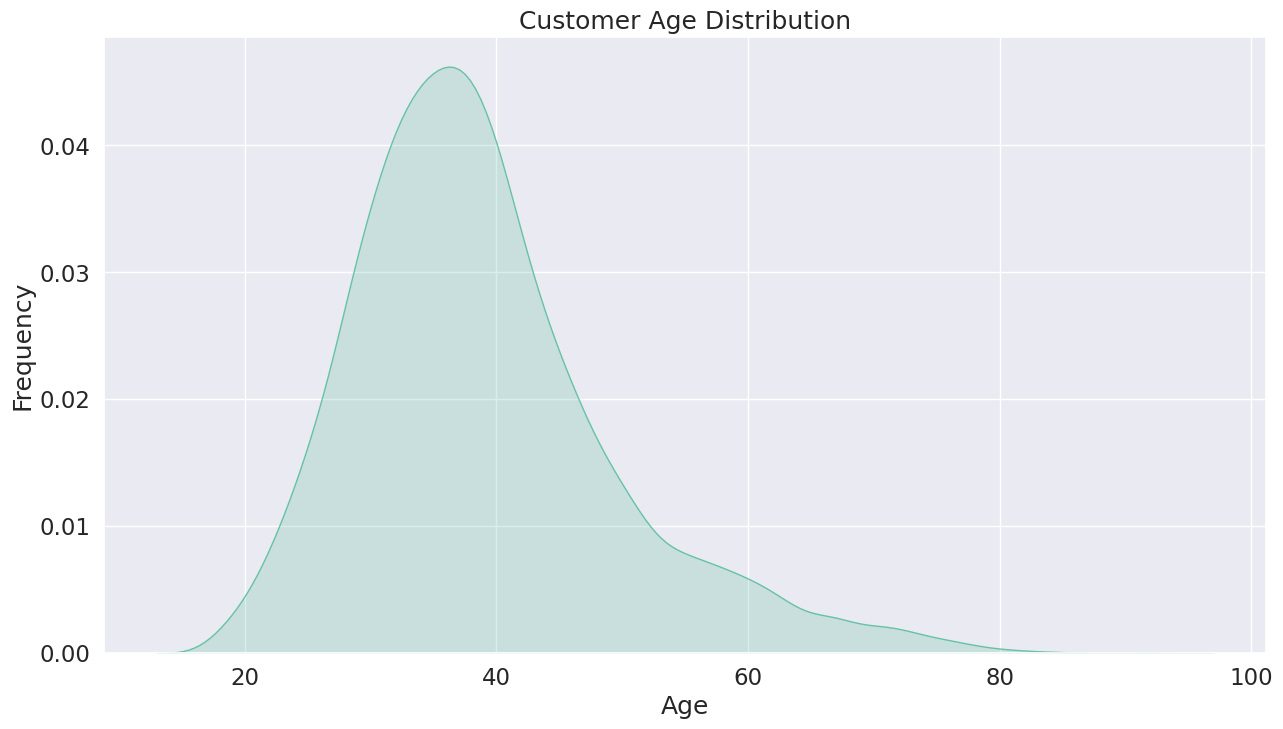

In [ ]:
plt.figure(figsize= (15, 8))

sns.kdeplot(df['Age'], fill=True, palette = 'Set2')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Tenure'].value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


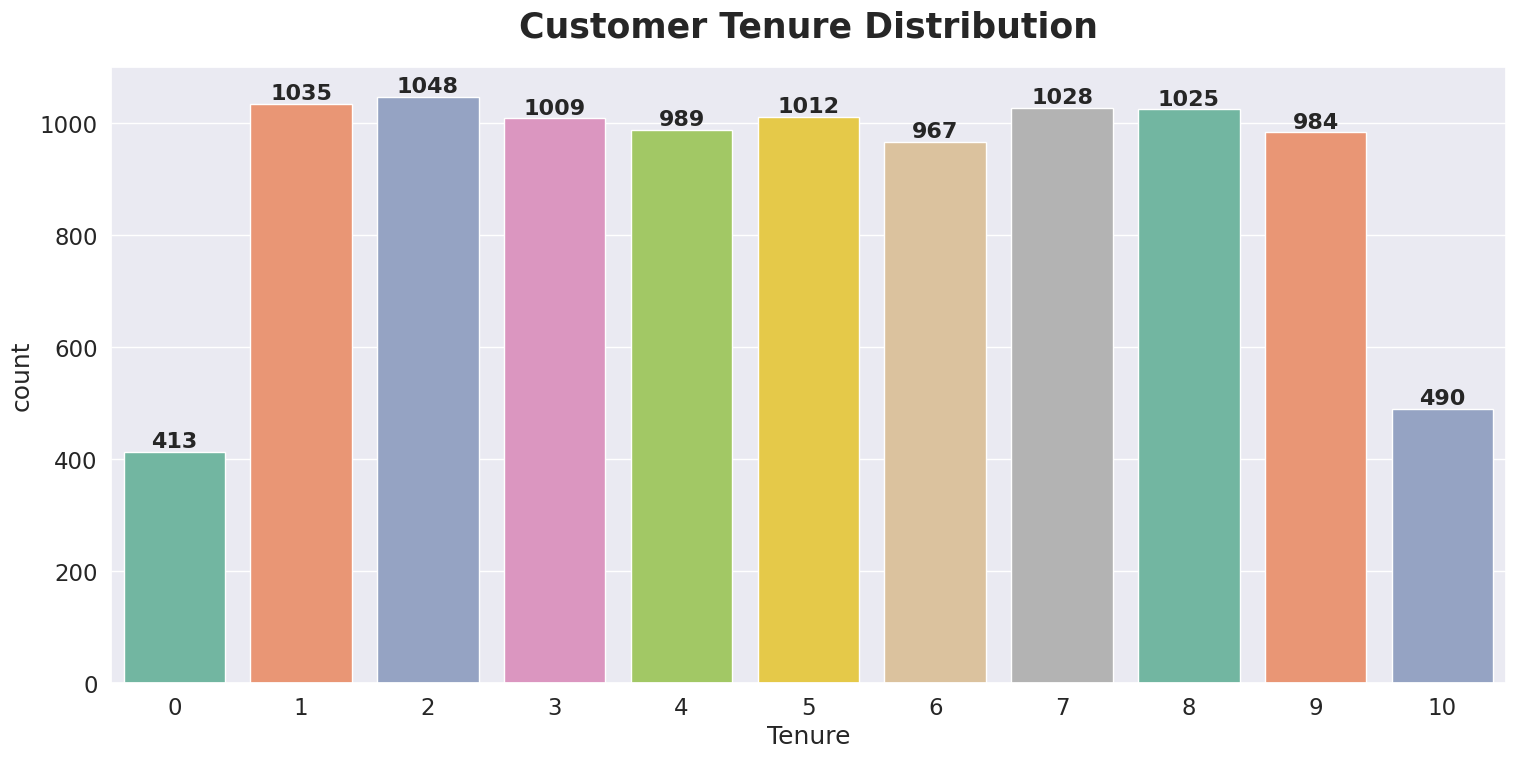

In [ ]:
plt.figure(figsize=(18, 8))
ax = sns.countplot( data= df, x = 'Tenure', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container, fontweight='black', size=16)
plt.title('Customer Tenure Distribution', fontweight = 'black' , size = 25, pad = 22)

plt.show()

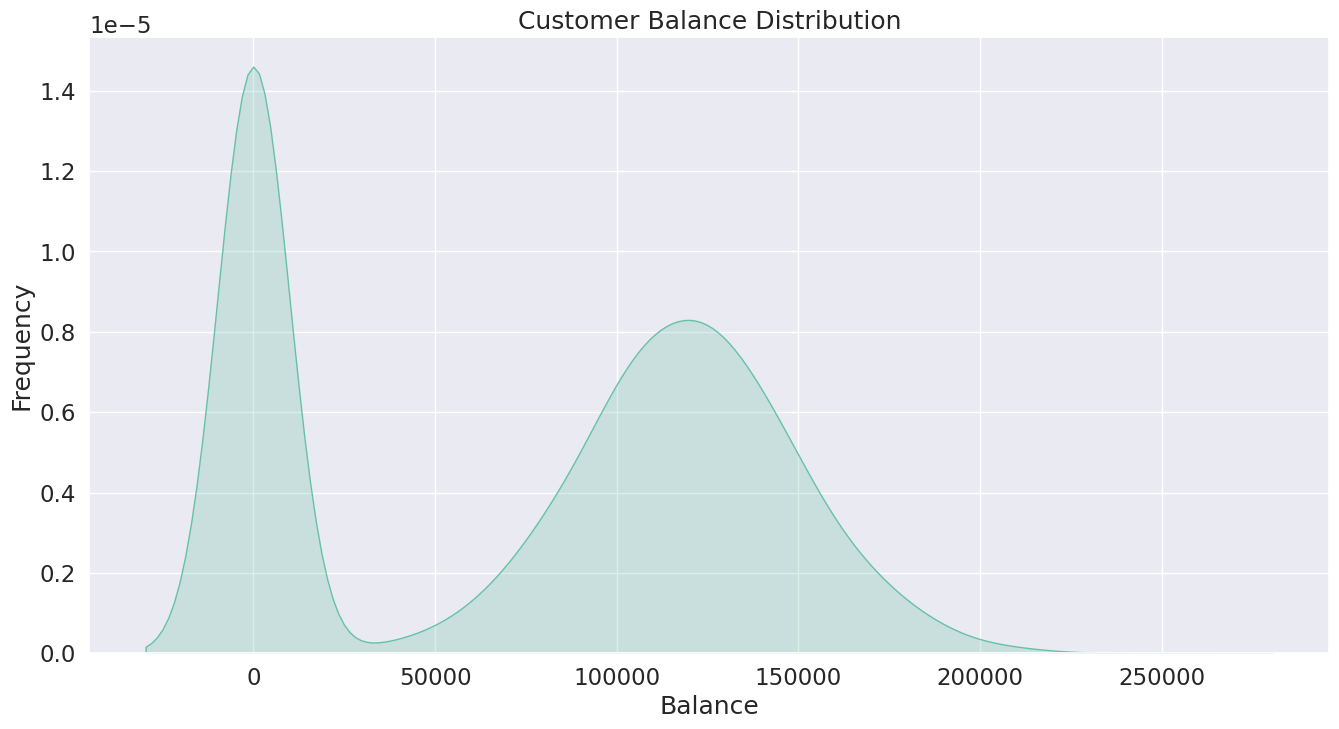

In [ ]:
plt.figure(figsize = (16 , 8))

sns.kdeplot(df['Balance'], fill = True, palette = 'Set2')
plt.title('Customer Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.show()

In [ ]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


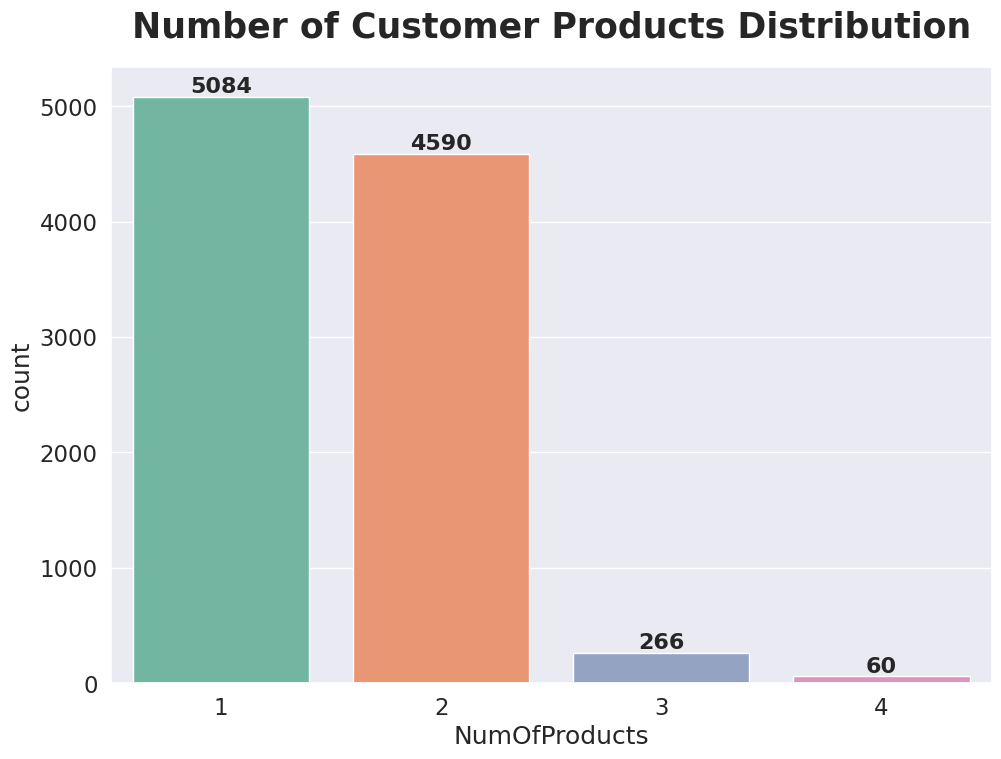

In [ ]:
count = df['NumOfProducts'].value_counts()

plt.figure(figsize=(25 , 8))
plt.subplot( 1, 2 , 1)

ax = sns.countplot( data = df , x = 'NumOfProducts' , palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container, fontweight='black', size=16)
plt.title('Number of Customer Products Distribution', fontweight = 'black' , size = 25, pad = 22)

plt.show()